# clustring: K-means

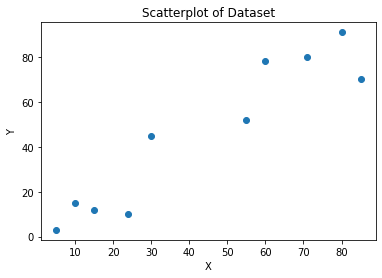

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
from sklearn.cluster import KMeans
import seaborn as sns
# prepare data
X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
plt.scatter(X[:,0],X[:,1])

plt.title('Scatterplot of Dataset')
plt.xlabel('X')
plt.ylabel('Y')
 
# Show graph
plt.show()


[[70.2 74.2]
 [16.8 17. ]]


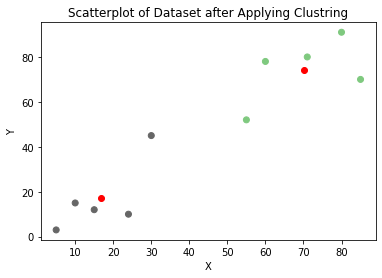

In [33]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='Red')
plt.title('Scatterplot of Dataset after Applying Clustring')
plt.xlabel('X')
plt.ylabel('Y')
 
# Show graph
plt.show()

Points are assigned to the closest centroid(red)

C:\Users\Afnan\anaconda3\A\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


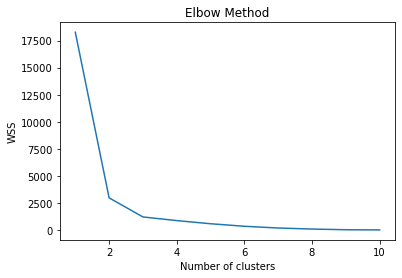

In [34]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    #Sum of squared distances of samples to their closest cluster center
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

[[70.2 74.2]
 [16.8 17. ]]


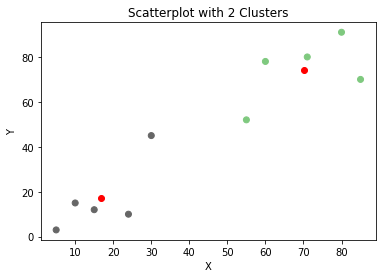

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='Red')
plt.title('Scatterplot with 2 Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]


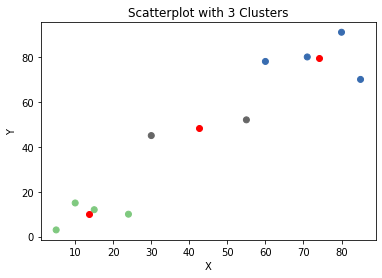

In [36]:
# try 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='Red')
plt.title('Scatterplot with 3 Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Marketing Problem:###
How to segment my customers into different groups based on their shopping trends so I can know to whom should I target my campaign? 


In [37]:
#load data
customer_data = pd.read_csv('shopping-data.csv')
# show data head
customer_data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


C:\Users\Afnan\anaconda3\A\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


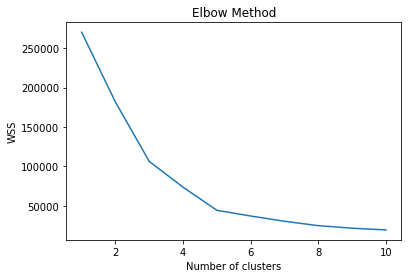

In [38]:
wss = []
# remove customer id
data = customer_data.iloc[:, 1:3].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    #Sum of squared distances of samples to their closest cluster center
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


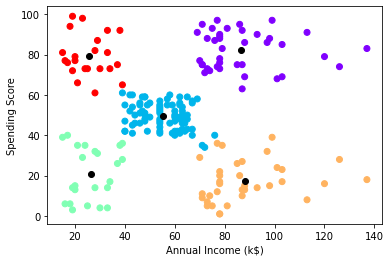

In [39]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

#### Interpretations ####
- The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully.</br>
- The customers at top right (blue data points), these are the customers with high salaries and high spending. These are the type of customers that companies target.</br> 
- The customers in the middle (red data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.</br>


### The task is to group 620 high school seniors based on their grades in three subject areas: English, mathematics, and science. The grades are averaged over their high school career and assume values from 0 to 100.###

In [45]:
# load data
data = pd.read_csv('grades_km_input.csv')
# show data head
data.head()

,Student,English,Math,Science
0,1,99,96,97
1,2,99,96,97
2,3,98,97,97
3,4,95,100,95
4,5,95,96,96


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Student  620 non-null    int64
 1   English  620 non-null    int64
 2   Math     620 non-null    int64
 3   Science  620 non-null    int64
dtypes: int64(4)
memory usage: 19.5 KB


C:\Users\Afnan\anaconda3\A\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


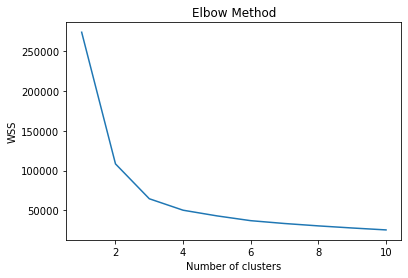

In [42]:
wss = []
# remove customer id
data = data.iloc[:, 1:4].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    #Sum of squared distances of samples to their closest cluster center
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


In [43]:
# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
print(kmeans.cluster_centers_)

[[97.16981132 93.30188679 94.85534591]
 [73.22018349 64.62844037 65.84862385]
 [85.82716049 79.67078189 81.45679012]]


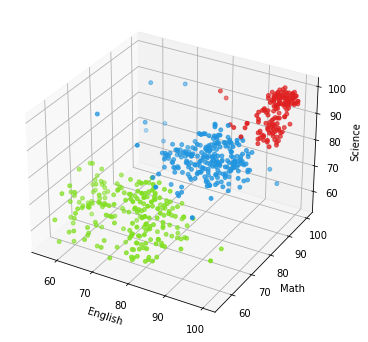

In [46]:

data['cluster'] = kmeans.fit_predict(data[['English', 'Math', 'Science']])
colors = ['#DF2020', '#81DF20', '#2095DF']
data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.English, data.Math, data.Science, c=data.c, s=15)

ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')
plt.show()

### Interpretations ####
***The plot indicates the three clusters of students: the top academic students (red), the academically challenged students (green), and the other students (blue) who fall somewhere between those two groups.***